# Emergency - 911 Calls / Montgomery County, PA

On this notebook you will see an analysis with Python using Pandas and Matplotlib of the dataset Emergency 911 Calls by Montgomery County, PA. You will see some powerful visualizations using additional features I created from the original data. 

### Project Planning
* Import the libraries and Dataset
* Explore the dataset
* Data wrangling
* Visualizations 


#### Importing the libraries and Dataset

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #visualizations
import seaborn as sns #visualizations

%matplotlib inline

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('911.csv')

#### Exploring the dataset

In [3]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


In [4]:
#All unique entries
df.nunique()

lat           25949
lng           25980
desc         663282
zip             204
title           148
timeStamp    640754
twp              68
addr          41292
e                 1
dtype: int64

In [5]:
#Dropping non useful columns
del df['e']

In [6]:
df.describe()

,lat,lng,zip
count,663522.000000,663522.000000,583323.000000
mean,40.158162,-75.300105,19236.055791
std,0.220641,1.672884,298.222637
min,0.000000,-119.698206,1104.000000
25%,40.100344,-75.392735,19038.000000
50%,40.143927,-75.305143,19401.000000
75%,40.229008,-75.211865,19446.000000
max,51.335390,87.854975,77316.000000


In [7]:
# Transforming the type of the timeStamp column from object date time
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  float64       
 1   lng        663522 non-null  float64       
 2   desc       663522 non-null  object        
 3   zip        583323 non-null  float64       
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663229 non-null  object        
 7   addr       663522 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 40.5+ MB


#### Data wrangling

In [9]:
#Creating hour, month, day, year, date of the week column form the timeStamp
df['hour'] = df['timeStamp'].apply(lambda z: z.hour)
df['month'] = df['timeStamp'].apply(lambda z: z.month)
df['day_week'] = df['timeStamp'].apply(lambda z: z.dayofweek)
df['year'] = df['timeStamp'].apply(lambda z: z.year)
df['date'] = df['timeStamp'].apply(lambda z: z.date())

#Day_week is an integer from 0-6, we will use the map function to change it to a string
df['day_week'] = df['day_week'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

In [10]:
#creating a column to check if the call was made during the night or during the day
df["d/n"] = df["hour"].apply(lambda z: "night" if z > 19 & z < 5 else "day")

In [11]:
#Separating the title column into type and title
df['class'] = df['title'].apply(lambda x: x.split(':')[0])
df['title'] = df['title'].apply(lambda x: x.split(':')[1])

#Deleting - and afterspacing
df['title'].replace('-', ' ', regex=True, inplace=True)
df['title'] = df['title'].str.strip()

In [12]:
#Ordering columns for aesthetics
column_order = ['lat', 'lng', 'twp', 'addr', 'zip', 'class', 'title', 'desc', 'year', 'month',
                'day_week', 'hour', 'date', 'd/n', 'timeStamp']
df = df[column_order]
df.columns

Index(['lat', 'lng', 'twp', 'addr', 'zip', 'class', 'title', 'desc', 'year',
       'month', 'day_week', 'hour', 'date', 'd/n', 'timeStamp'],
      dtype='object')

#### Visualizations 

Text(0, 0.5, '# of incidents')

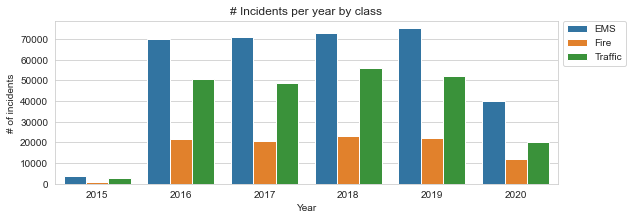

In [13]:
#Number of cases by year
plt.figure(figsize=(9,3))
sns.countplot(x='year', data=df, hue='class')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.title('# Incidents per year by class')
plt.xlabel('Year')
plt.ylabel('# of incidents')

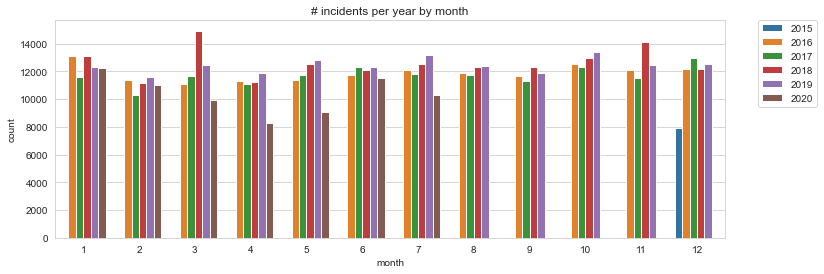

In [14]:
#Plot of each month by year
plt.figure(figsize=(12,4))
sns.countplot(data= df, x= "month", hue= "year")
plt.title("# incidents per year by month")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<AxesSubplot:xlabel='month'>

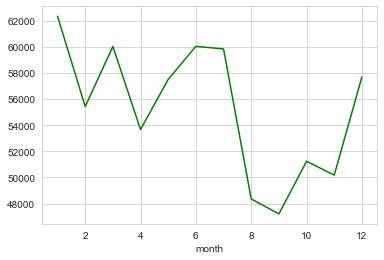

In [15]:
#Number of cases by month
g_month = df.groupby('month').count() #grouping by month
g_month['class'].plot(color='green')

Text(0, 0.5, '# of incidents')

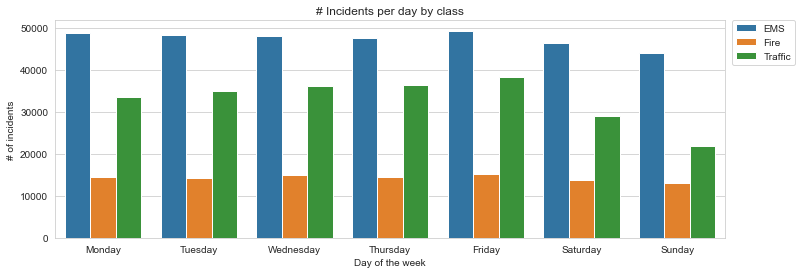

In [16]:
plt.figure(figsize=(12,4))
sns.countplot(x='day_week', data=df, hue='class', 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.title('# Incidents per day by class')
plt.xlabel('Day of the week')
plt.ylabel('# of incidents')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 1.0, 'Day/Night Call Reports by month')

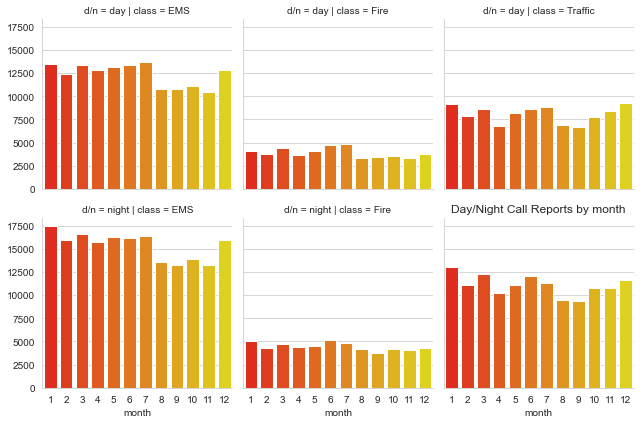

In [17]:
#difference of incidents by day or night and divided my month
day_night = sns.FacetGrid(df, row ="d/n", col="class", height = 3)
day_night.map(sns.countplot, 'month', palette='autumn')
plt.title("Day/Night Call Reports by month")

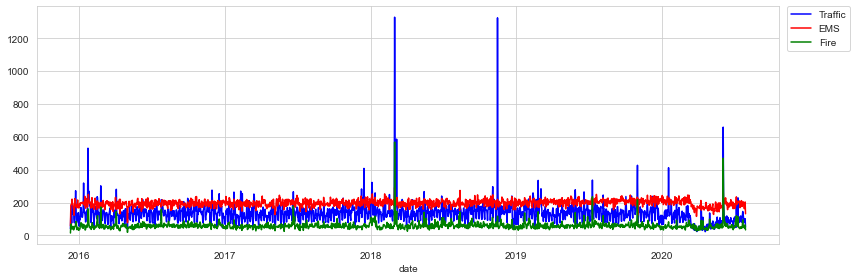

In [18]:
#Plot of each class of incident by date
plt.figure(figsize=(12,4))

df[df['class'] == 'Traffic'].groupby('date').count()['title'].plot(color='blue')
df[df['class'] == 'EMS'].groupby('date').count()['title'].plot(color='red')
df[df['class'] == 'Fire'].groupby('date').count()['title'].plot(color='green')

plt.legend(('Traffic', 'EMS', 'Fire'), bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

<AxesSubplot:xlabel='hour', ylabel='day_week'>

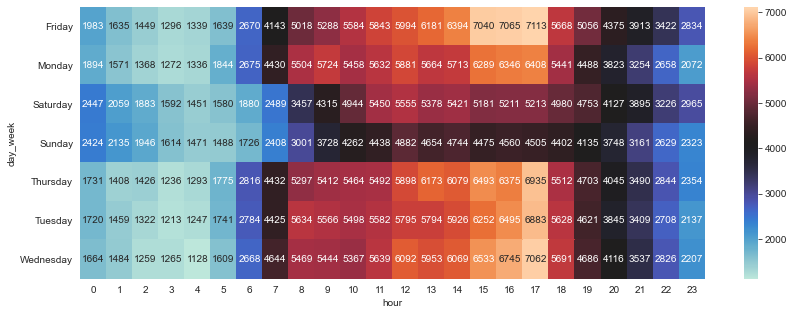

In [19]:
#Heatmap of the incidents by hour and by day
day_hour = df.groupby(by=['day_week','hour']).count()['title']
plt.figure(figsize=(14,5))
sns.heatmap(day_hour.unstack(), cmap='icefire', annot=True, fmt='d')

### Thank you for reviewing my code :) 
Have a nice day